#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Data Dictionary</b>

##### Variable	& Definition
 - Survived (Target) :	Survival of passenger	(0 = No, 1 = Yes)
 - Pclass : Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
 - Sex : Gender	
 - Age : Age in years	
 - Sibsp :	# of siblings / spouses aboard the Titanic	
 - Parch : # of parents / children aboard the Titanic	
 - Ticket :	Ticket number	
 - Fare :	Passenger fare	
 - Cabin : Cabin number	
 - Embarked :	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S =  Southampton)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It contains these features - 'PassengerId', 'Survived','Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.

Dropping insignificant columns as a person's survival may not depend on these variables.

In [4]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

### Separate inputs and target

In [5]:
target = df.Survived # target column
inputs = df.drop(['Survived'],axis=1) # actual df is safe but we are copying it to inputs
inputs

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500
...,...,...,...,...,...
886,887,2,male,27.0,13.0000
887,888,1,female,19.0,30.0000
888,889,3,female,NaN,23.4500
889,890,1,male,26.0,30.0000


Encode categorical variables'Sex', as decision tree (implemented in sklearn) only understands numerical variables only.

In [6]:
inputs.Sex = inputs.Sex.map({'male':1, 'female':2})

## Data Pre-processing

In [7]:
inputs.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age             True
Fare           False
dtype: bool

There are a few NaN values in Age. So we will  fill those missing values with the avergae age.

In [8]:
# fillna replaces the NaN values with a value inside it
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [9]:
# verifying the NaN values
inputs.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
Fare           False
dtype: bool

Now no more NaN values

In [10]:
inputs[:10]

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,1,22.000000,7.2500
1,2,1,2,38.000000,71.2833
2,3,3,2,26.000000,7.9250
3,4,1,2,35.000000,53.1000
4,5,3,1,35.000000,8.0500
5,6,3,1,29.699118,8.4583
6,7,1,1,54.000000,51.8625
7,8,3,1,2.000000,21.0750
8,9,3,2,27.000000,11.1333
9,10,2,2,14.000000,30.0708


### Separate training and testing data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

30% be used as test data and rest be training data.

X_train, y_train : inputs and target of training data
X_test, y_test : inputs and target of testing data

<b> Check the length of Traing and Testing Data</b>

In [12]:
print('Length of Training Data : {} that is 70% of original data.'.format(len(X_train)))
print('Length of Testing Data : {} that is 30% of original data.'.format(len(X_test)))

Length of Training Data : 623 that is 70% of original data.
Length of Testing Data : 268 that is 30% of original data.


<b>Import Decision Tree Classifier</b> 
In this project, our target variable is of binary data type. So a Classification model will be used.

In [13]:
from sklearn import tree

# initialize a Decision Tree classifier model.
model = tree.DecisionTreeClassifier()

<b>Model Training</b>

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

<b>After model training, make predictions for that testing data.</b>

In [15]:
model_accuracy = model.score(X_test,y_test)
print('Print model accuracy =',round(model_accuracy,3))


# from sklearn.metrics import accuracy_score
# Y_train_predict=model.predict(X_train)
# print(accuracy_score(y_train,Y_train_predict))

Print model accuracy = 0.743


<b> Plot Decision Tree </b>

[Text(3330.4927500000003, 5830.110000000001, 'X[2] <= 1.5\ngini = 0.465\nsamples = 623\nvalue = [394, 229]'),
 Text(1387.8855, 5531.13, 'X[3] <= 3.5\ngini = 0.29\nsamples = 409\nvalue = [337, 72]'),
 Text(838.6740000000001, 5232.150000000001, 'X[1] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(767.2500000000001, 4933.17, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(910.0980000000001, 4933.17, 'X[4] <= 22.512\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(838.6740000000001, 4634.1900000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(981.522, 4634.1900000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(1937.0970000000002, 5232.150000000001, 'X[4] <= 26.269\ngini = 0.269\nsamples = 399\nvalue = [335, 64]'),
 Text(1195.794, 4933.17, 'X[3] <= 14.0\ngini = 0.197\nsamples = 298\nvalue = [265, 33]'),
 Text(1124.3700000000001, 4634.1900000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1267.218, 4634.1900000000005, 'X[0] <= 581.5\ngini = 0.188

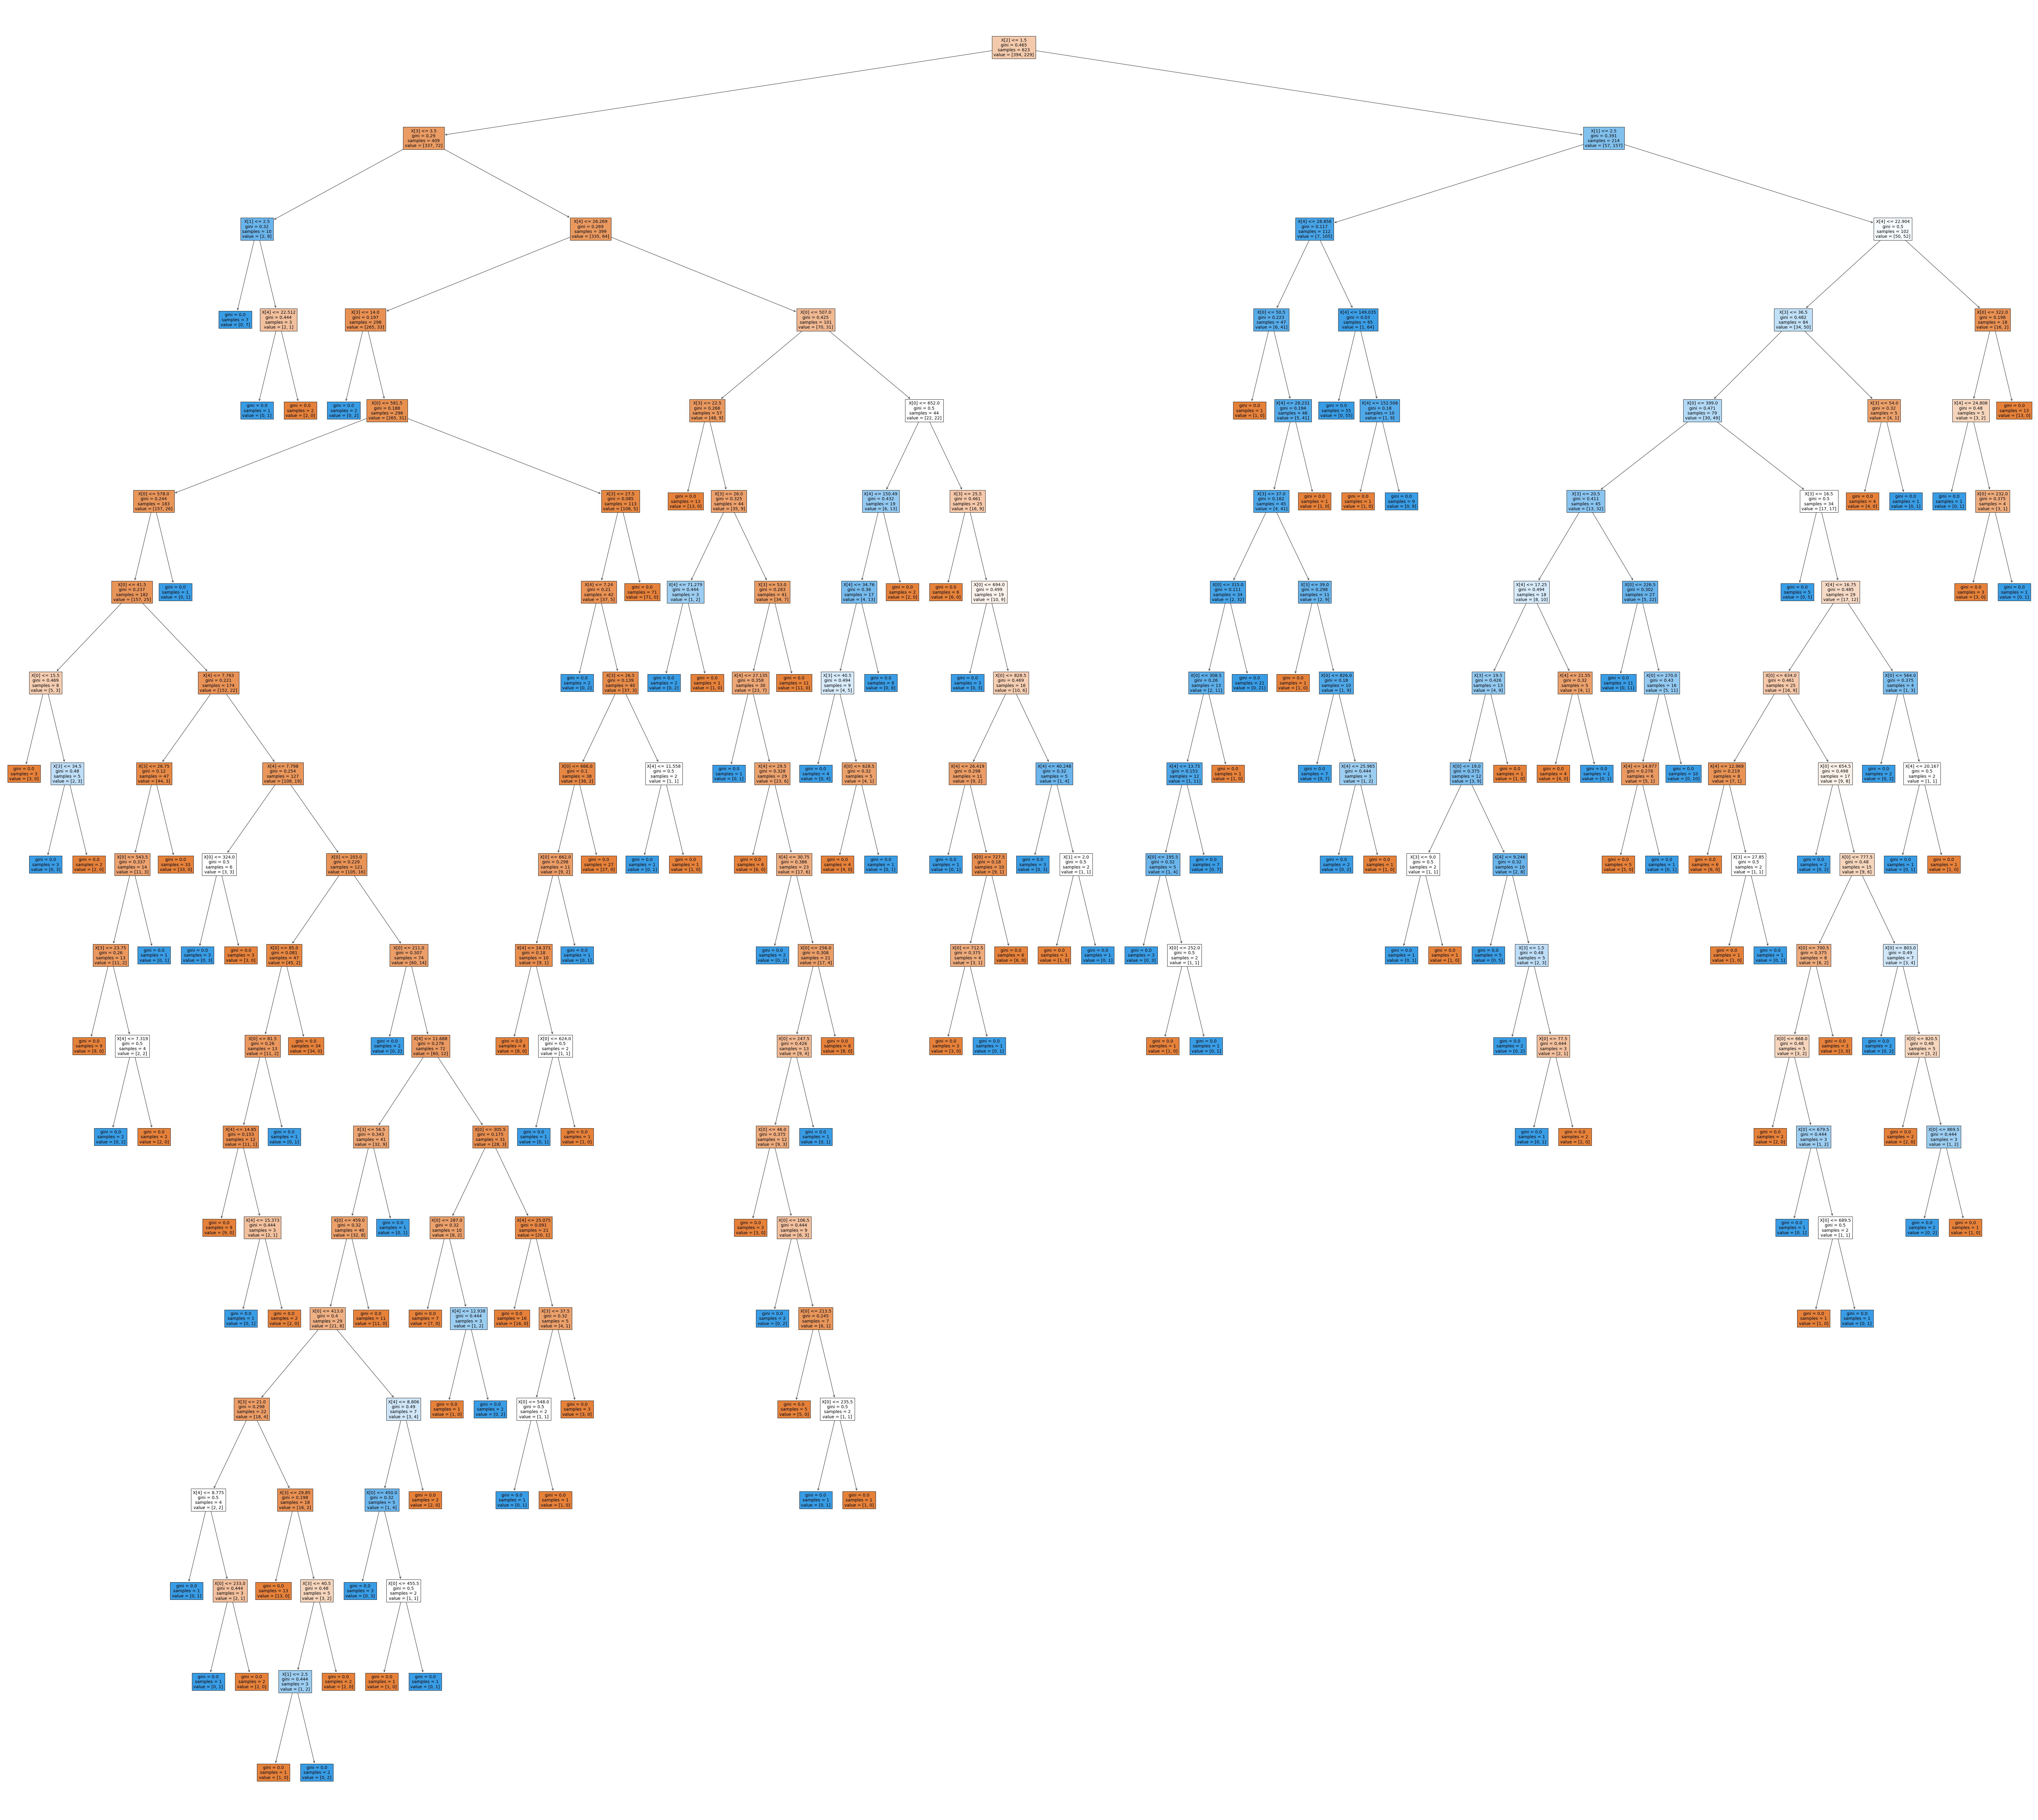

In [16]:
# Initialize a figure and use figsize to control the size of the rendered image.
plt.figure(figsize=(120,110))

# Plot Decision tree
tree.plot_tree(model, filled=True)

#Here filled is boolean parameter (default value = False) When set to True, 
#it paints the decisiontree nodes to indicate majority class for classification problem.

[<b> Minimal Cost-Complexity Pruning</b>](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)  
Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.  
ccp_alpha : (non-negative float, default=0.0)
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. 

In [17]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.00098092, 0.00107009, 0.00128411, 0.00128411,
       0.00137583, 0.00142679, 0.00144462, 0.00144462, 0.00144462,
       0.00144462, 0.00145921, 0.00146131, 0.00146692, 0.00147138,
       0.00150482, 0.00150482, 0.00158044, 0.00160229, 0.00166687,
       0.00182402, 0.00190238, 0.00191088, 0.00199076, 0.00206587,
       0.00206896, 0.00214018, 0.00214018, 0.00225402, 0.00230095,
       0.00236393, 0.00256822, 0.00256822, 0.00256822, 0.00267523,
       0.00270469, 0.00280967, 0.00285968, 0.00299625, 0.00353693,
       0.00355659, 0.00364281, 0.00381265, 0.00511159, 0.00932544,
       0.01115353, 0.01281171, 0.03134851, 0.14023146])

In [18]:
from sklearn.tree import DecisionTreeClassifier

For each value of ccp_alpha, train a DecisionTree model and store it in models.

In [19]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14023145985547986


For all the models trained for different values of ccp_alpha, find training and testing accuracy and plot it.

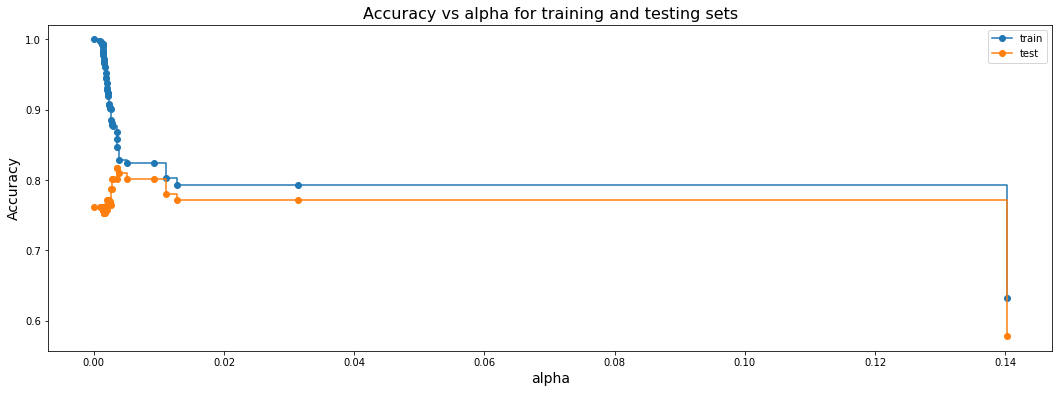

In [20]:
# Calculate train and test accuracy of all the models
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

# plot training and testingaccuracy
fig, ax = plt.subplots(figsize = (18,6))
ax.set_xlabel("alpha", fontsize = 14)
ax.set_ylabel("Accuracy", fontsize = 14)
ax.set_title("Accuracy vs alpha for training and testing sets", fontsize = 16)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

<b> Train Final Decision tree model with the selected value of ccp_alpha.</b>

In [21]:
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=0)

In [22]:
# Make predictions for testing data
pred=model.predict(X_test)

# Import accuracy_score, which also calculates the accuracy of predictions
from sklearn.metrics import accuracy_score
print('Model accuracy after post-pruning :',round(accuracy_score(y_test, pred),3))

Model accuracy after post-pruning : 0.802


The model accuracy after post pruning increased. This shows that without post pruning, our initial decisionTree model was over-fitting on the training data.

<b> Lets visualize our final DecisonTree model to observe the effect of post-pruning. </b>

[Text(418.5, 513.4, 'X[2] <= 1.5\ngini = 0.465\nsamples = 623\nvalue = [394, 229]'),
 Text(132.1578947368421, 453.0, 'X[3] <= 3.5\ngini = 0.29\nsamples = 409\nvalue = [337, 72]'),
 Text(88.10526315789474, 392.6, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(176.21052631578948, 392.6, 'X[4] <= 26.269\ngini = 0.269\nsamples = 399\nvalue = [335, 64]'),
 Text(88.10526315789474, 332.2, 'X[3] <= 14.0\ngini = 0.197\nsamples = 298\nvalue = [265, 33]'),
 Text(44.05263157894737, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(132.1578947368421, 271.8, 'gini = 0.188\nsamples = 296\nvalue = [265, 31]'),
 Text(264.3157894736842, 332.2, 'X[0] <= 507.0\ngini = 0.425\nsamples = 101\nvalue = [70, 31]'),
 Text(220.26315789473685, 271.8, 'gini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(308.36842105263156, 271.8, 'X[0] <= 652.0\ngini = 0.5\nsamples = 44\nvalue = [22, 22]'),
 Text(220.26315789473685, 211.39999999999998, 'X[4] <= 150.49\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Te

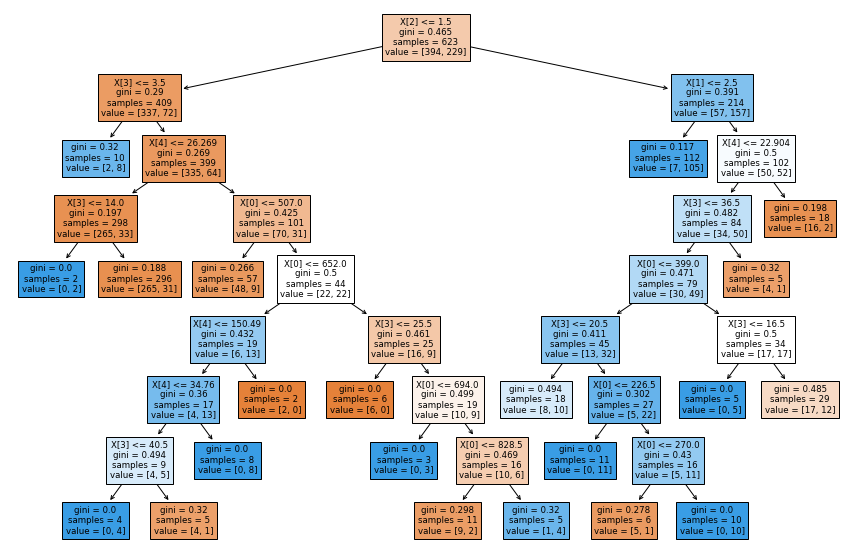

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)